#### Description:
* The architecture has an input that accepts a two-dimensional monochromatic image (handwritten digit)
* The first convolutional layer will look for relatively large simple features like straight lines 
* As we move deeper into the network, the network is able to look for smaller more complex features 
* The final layer, is an output layer with 10 softmax neurons that outputs probability of any given input

#### Load Dependencies

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Dropout, Conv2D
from matplotlib import pyplot as plt

#### Load Data

In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_valid.shape

(10000, 28, 28)

In [7]:
y_valid.shape

(10000,)

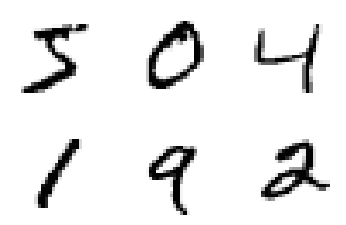

In [20]:
plt.figure(figsize=(6,6))

for k in range(6):
    plt.subplot(3,3, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('OFF')



In [21]:
y_train[0:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

#### Preprocess data

In [23]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') # we add 1 in depth because it's monochromatic
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

In [24]:
X_train /= 255.0
X_valid /= 255.0

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
y_valid

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [27]:
n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [28]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [36]:
model = Sequential()

# First hidden layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second hidden layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
 
# Third hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(n_classes, activation='softmax'))     

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

* (28, 28, 1) --> (26, 26, 32) because we have 32 kernel
* (26, 26, 32) --> (24, 24, 64) because we have 64 kernel
* (12, 12, 64) maxpooling reduces height and width
* 9216 = 12 * 12 * 64
* 1179776 = 9216 * 128 + 128
* 1290 = 128 * 10 + 10


#### Configure model

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

#### Train

In [40]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
469/469 [==============================] - 138s 270ms/step - loss: 0.2279 - accuracy: 0.9297 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 120s 256ms/step - loss: 0.0844 - accuracy: 0.9754 - val_loss: 0.0347 - val_accuracy: 0.9887
Epoch 3/10
469/469 [==============================] - 98s 210ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 4/10
469/469 [==============================] - 92s 197ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0294 - val_accuracy: 0.9899
Epoch 5/10
469/469 [==============================] - 93s 198ms/step - loss: 0.0443 - accuracy: 0.9866 - val_loss: 0.0283 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 99s 211ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0296 - val_accuracy: 0.9902
Epoch 7/10
469/469 [==============================] - 97s 208ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0250 - val_